<a href="https://colab.research.google.com/github/SnapeSnoop/MachineLearning/blob/main/MLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 02 - Regression

Isikan identitas berikut
NIM:2241727009  
Nama: Eka Mahendra BagasKara
Kelas: 4J

## Tujuan
1. Mahasiswa mampu menjelaskan konsep regresi
2. Mahasiswa mampu menerapkan konsep regresi untuk kasus prediksi data

## Kegiatan Praktikum

Kegiatan praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis prediksi. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan regresi.

### Persiapan Data

In [10]:
# import package
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving TikTok_songs_2020.csv to TikTok_songs_2020.csv


In [11]:
# baca data
data = pd.read_csv('TikTok_songs_2020.csv')
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Say So,Doja Cat,88,Hot Pink,80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893
1,Blinding Lights,The Weeknd,93,After Hours,90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040
2,Supalonely (feat. Gus Dapperton),BENEE,67,Hey u x,63,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488
3,Savage,Megan Thee Stallion,82,Suga,70,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497
4,Moral of the Story,Ashe,68,Moral of the Story,76,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084


In [12]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        292 non-null    object 
 1   artist_name       292 non-null    object 
 2   artist_pop        292 non-null    int64  
 3   album             292 non-null    object 
 4   track_pop         292 non-null    int64  
 5   danceability      292 non-null    float64
 6   energy            292 non-null    float64
 7   loudness          292 non-null    float64
 8   mode              292 non-null    int64  
 9   key               292 non-null    int64  
 10  speechiness       292 non-null    float64
 11  acousticness      292 non-null    float64
 12  instrumentalness  292 non-null    float64
 13  liveness          292 non-null    float64
 14  valence           292 non-null    float64
 15  tempo             292 non-null    float64
 16  time_signature    292 non-null    int64  
 1

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,67.318493,61.19863,0.725404,0.612855,-6.884469,0.534247,5.041096,0.150245,0.232500,0.028654,0.187648,0.545168,119.770538,3.945205,192805.212329
std,16.571140,20.78498,0.143129,0.163366,2.697198,0.499682,3.689638,0.150504,0.255970,0.114149,0.141949,0.212719,25.609372,0.316354,55763.157757
min,0.000000,0.00000,0.174000,0.045800,-23.928000,0.000000,0.000000,0.025900,0.000041,0.000000,0.021900,0.038900,71.994000,1.000000,37632.000000
25%,57.750000,57.00000,0.651000,0.489250,-8.369750,0.000000,1.000000,0.045200,0.027050,0.000000,0.095175,0.389750,100.064000,4.000000,158673.000000
50%,69.000000,66.00000,0.734500,0.631000,-6.523000,1.000000,5.000000,0.084650,0.129000,0.000000,0.124000,0.554500,119.967000,4.000000,191130.000000
75%,80.000000,74.00000,0.831750,0.729000,-4.983500,1.000000,8.000000,0.217000,0.329250,0.000196,0.251000,0.712750,131.334750,4.000000,221394.750000
max,95.000000,90.00000,0.980000,0.955000,-2.607000,1.000000,11.000000,0.907000,0.974000,0.856000,0.944000,0.967000,210.857000,5.000000,467587.000000


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


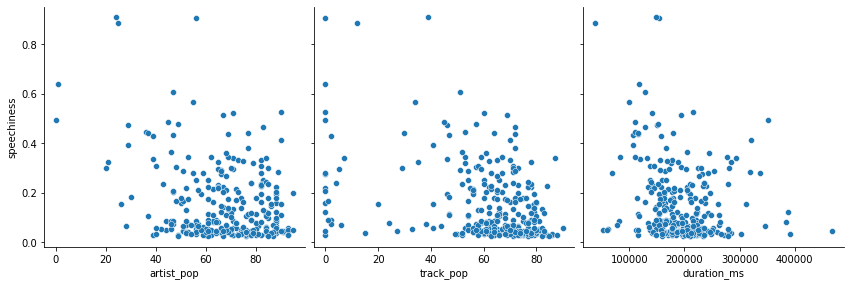

In [14]:
# operasi visualisasi
sns.pairplot(data, x_vars=['artist_pop','track_pop','duration_ms'], 
             y_vars='speechiness', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

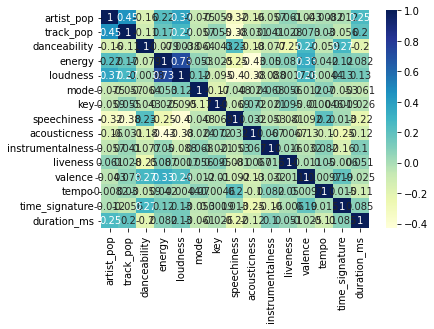

In [15]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [16]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['artist_pop']
y = data['track_pop']

In [17]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [18]:
# hasil training dtaset
X_train
y_train

111    39
268    69
195     0
227    55
47     74
       ..
66     73
53     72
79     69
280    64
8      75
Name: track_pop, Length: 204, dtype: int64

In [19]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const         23.412207
artist_pop     0.546943
dtype: float64

In [21]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              track_pop   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     45.04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.91e-10
Time:                        00:26:35   Log-Likelihood:                -892.52
No. Observations:                 204   AIC:                             1789.
Df Residuals:                     202   BIC:                             1796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4122      5.702      4.106      0.000      12.168      34.656
artist_pop     0.5469      0.081      6.711      0.000       0.386       0.708
==============================================================================
Omnibus:                       90.017   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.160
Skew:                          -2.006   Prob(JB):                     2.60e-53
Kurtosis:                       6.521   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

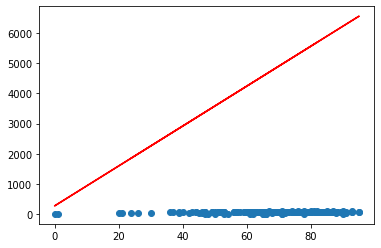

In [22]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [23]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


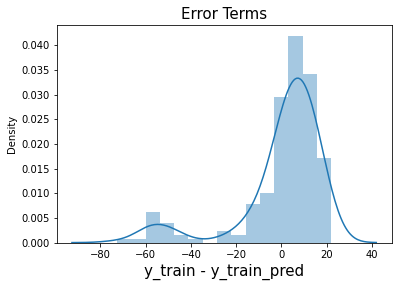

In [24]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

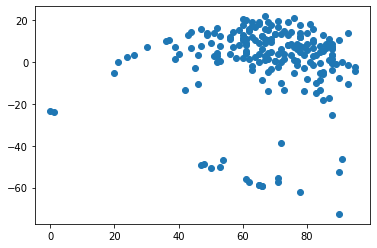

In [25]:
plt.scatter(X_train,res)
plt.show()

In [26]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


218    70.449293
161    66.073751
120    69.355408
85     64.979865
171    70.996236
dtype: float64

In [27]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.25758663966051054

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

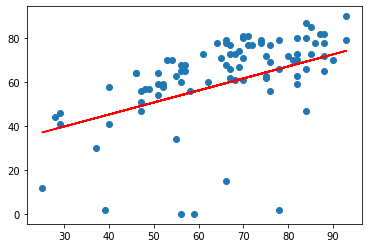

In [28]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()